<a href="https://colab.research.google.com/github/michaelsernaque22/RNN_Simple/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import sklearn
from datetime import datetime

In [ ]:
data=pd.read_csv('Data.csv')

In [ ]:
data.head()

,Fecha,NDVI,Temp_prom,Viento,Humedad,Precipitacion,Cls
0,3/23/2016,0.73,20.0,2.9,68.5,9.1,2
1,4/22/2016,0.69,20.5,3.4,64.0,0.7,1
2,5/2/2016,0.72,27.0,2.9,59.0,2.6,2
3,5/22/2016,0.68,28.0,2.4,60.0,0.0,1
4,6/11/2016,0.44,20.0,2.3,61.5,0.3,0


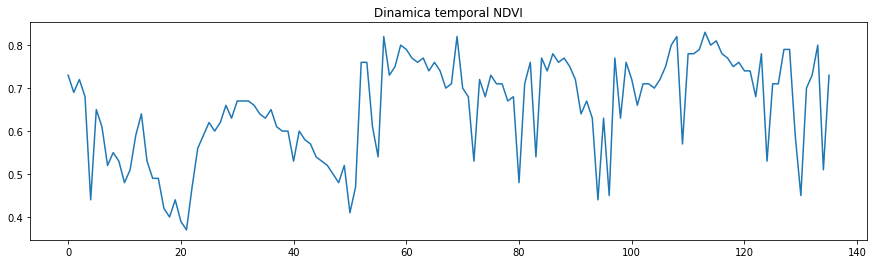

In [ ]:
data_1 = data['NDVI']
plt.figure(figsize = (15,4))
plt.plot(data_1)
plt.title("Dinamica temporal NDVI")
plt.show()

In [ ]:
last_index = int(len(data_1) * 0.80)
train = data_1[:last_index].values.reshape(-1,1)
test = data_1[last_index:].values.reshape(-1,1)
train.shape, test.shape

((108, 1), (28, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)
train[:10]

array([[0.8       ],
       [0.71111111],
       [0.77777778],
       [0.68888889],
       [0.15555556],
       [0.62222222],
       [0.53333333],
       [0.33333333],
       [0.4       ],
       [0.35555556]])

In [ ]:
def create_dataset(dataset, time_step=1):
  data_X, data_Y = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i + time_step), 0]   
    data_X.append(a)
    data_Y.append(dataset[i + time_step, 0])
  return np.array(data_X), np.array(data_Y)

time_step = 10
X_train, y_train = create_dataset(train, 10)
X_test, y_test = create_dataset(test, 10)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
 
model = Sequential([SimpleRNN(20, return_sequences = True, input_shape = [None,1]),
                    SimpleRNN(20, return_sequences = True),
                    SimpleRNN(20, return_sequences = True),
                    SimpleRNN(20, return_sequences = True),
                    SimpleRNN(20),
                    Dense(1)])
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 20)          440       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 3,741
Trainable params: 3,741
Non-trainabl

In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 80)

Epoch 1/80
4/4 [==============================] - 5s 240ms/step - loss: 7.0379e-08 - val_loss: 8.5239e-08
Epoch 2/80
4/4 [==============================] - 0s 21ms/step - loss: 7.0379e-08 - val_loss: 8.5239e-08
Epoch 3/80
4/4 [==============================] - 0s 20ms/step - loss: 7.0379e-08 - val_loss: 8.5239e-08
Epoch 4/80
4/4 [==============================] - 0s 20ms/step - loss: 7.0379e-08 - val_loss: 8.5239e-08
Epoch 5/80
4/4 [==============================] - 0s 19ms/step - loss: 7.0379e-08 - val_loss: 8.5239e-08
Epoch 6/80
4/4 [==============================] - 0s 19ms/step - loss: 7.0379e-08 - val_loss: 8.5239e-08
Epoch 7/80
4/4 [==============================] - 0s 19ms/step - loss: 7.0379e-08 - val_loss: 8.5239e-08
Epoch 8/80
4/4 [==============================] - 0s 19ms/step - loss: 7.0379e-08 - val_loss: 8.5239e-08
Epoch 9/80
4/4 [==============================] - 0s 21ms/step - loss: 7.0379e-08 - val_loss: 8.5239e-08
Epoch 10/80
4/4 [==============================] - 0s 

In [ ]:
test_predict = model.predict(X_test)
test_predict[:10]

array([[-1.6615463 ],
       [-0.70212936],
       [-1.0210199 ],
       [-1.0692412 ],
       [-0.92027265],
       [-1.0524123 ],
       [-1.0014449 ],
       [-0.971441  ],
       [-1.0664065 ],
       [-0.94456017]], dtype=float32)

In [ ]:
test_predict=scaler.inverse_transform(test_predict)

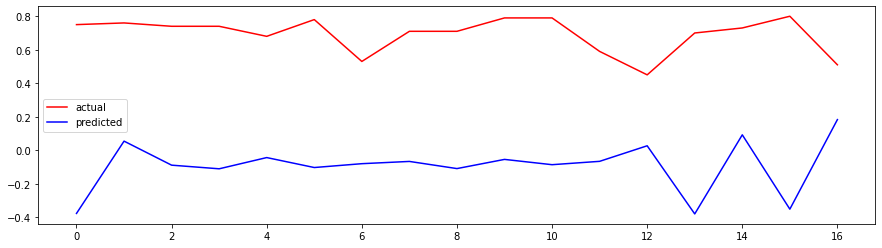

In [ ]:
plt.figure(figsize = (15,4))
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)), color = 'r', label = 'actual')
plt.plot(test_predict, color = 'b',label = 'predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,test_predict, squared = False)

0.8696675884002514